In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import json
import seaborn as sns

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center", fontsize = 14,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

# plt.show()

In [3]:
# -----------------------------------------------------
data_path = "./bidir_dag_lstm_result/test/result.json"

with open(data_path) as f:
    json_file = json.load(f)
    
    accuracy = json_file["accuracy"]
    tsne = json_file["tsne"]
    answer = json_file["answer"]
    output = json_file["output"]

Confusion matrix, without normalization
[[556 202]
 [ 86 630]]


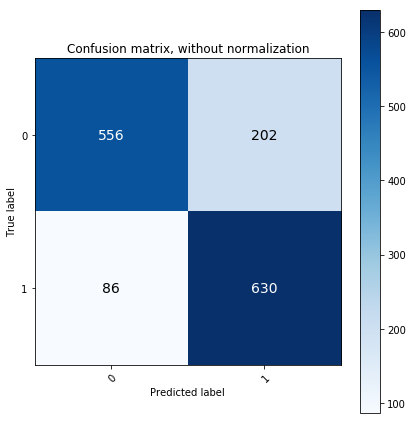

In [4]:
labels = np.asarray([0, 1, 2, 3, 4])
plot_confusion_matrix(np.asarray(answer), np.asarray(output), labels, normalize=False, title=None, cmap=plt.cm.Blues)
plt.show()

Normalized confusion matrix
[[0.73350923 0.26649077]
 [0.12011173 0.87988827]]


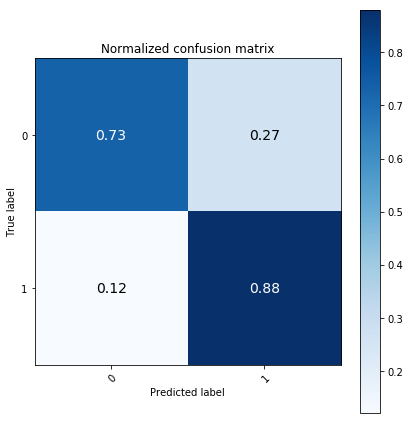

In [5]:
plot_confusion_matrix(np.asarray(answer), np.asarray(output), labels, normalize=True, title=None, cmap=plt.cm.Blues)
plt.show()

In [6]:
# binary_answer = []
# binary_output = []
# for r in range(len(answer)):
#     row_answer = []
#     row_output = []
#     for c in range(len(answer[0])):
#         if answer[r][c] < 4: 
#             row_answer += [0]
#         else:
#             row_answer += [1]
#         if output[r][c] < 4: 
#             row_output += [0]
#         else:
#             row_output += [1]
#     binary_answer += row_answer
#     binary_output += row_output

In [7]:
# plot_confusion_matrix(np.asarray(binary_answer), np.asarray(binary_output), classes, normalize=False, title=None, cmap=plt.cm.Blues)
# plt.show()

In [8]:
# plot_confusion_matrix(np.asarray(binary_answer), np.asarray(binary_output), classes, normalize=True, title=None, cmap=plt.cm.Blues)
# plt.show()

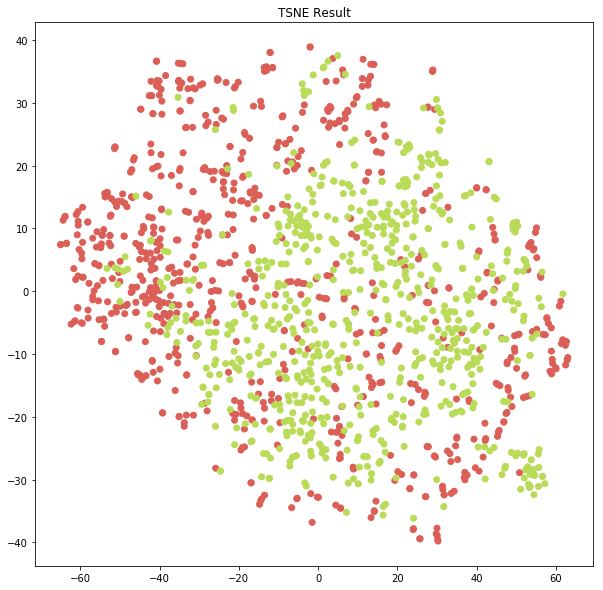

In [9]:

fig, ax = plt.subplots(figsize=(10, 10))

palette = np.array(sns.color_palette("hls", 5))
x1 = [t[0] for t in tsne]
x2 = [t[1] for t in tsne]
ax.scatter(x1, x2, c=palette[np.asarray(answer)])
ax.set_title('TSNE Result')
plt.show()